In [9]:
import os
import random
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import defaultdict

In [10]:
if 'Steam_all.pkl' not in os.listdir('./Dataset_BPR'):
    df = pd.read_csv('./Dataset_BPR/Steam.txt', sep=' ', header=None)
    df.columns = ['userID', 'gameID']
    
    df_sel = df.groupby('userID').filter(lambda x : len(x)>4)
    df_sel_groupby_user = df_sel.groupby('userID')['gameID'].apply(list)
    
    df_used = df_sel_groupby_user.sample(frac=0.01)
    df_all = pd.DataFrame()
    df_all['userID'] = df_used.index
    df_all['gameID'] = df_used.values
    
    df_all.to_pickle('./Dataset_BPR/Steam_all.pkl')
df_all = pd.read_pickle('./Dataset_BPR/Steam_all.pkl')

In [11]:
df_all

,userID,gameID
0,30317,"[5914, 10912, 2427, 5100, 3200, 5660, 6679, 45]"
1,1917,"[19, 700, 1572, 1994, 3485, 6472, 6776, 7062, ..."
2,18581,"[713, 2880, 10867, 4452, 11377, 2, 5176, 12385..."
3,211123,"[4759, 4490, 9395, 1309, 11528, 7636, 4586, 12..."
4,229382,"[12328, 6401, 5914, 8822, 2119, 11970]"
...,...,...
2809,266055,"[12053, 6454, 7285, 13031, 11970, 12278, 8736,..."
2810,139407,"[5176, 12164, 4582, 5914, 13031, 6359, 1437, 8..."
2811,152679,"[729, 1602, 4286, 4904, 5998]"
2812,266676,"[2639, 12268, 5199, 3351, 9066, 11755, 12328]"


In [12]:
if 'Steam_testSet.pkl' not in os.listdir('./Dataset_BPR'):
    allGames1 = []
    for i in df_all.gameID:
        allGames1 += i
    uniqueGames1 = set(allGames1)

    #negativeSamples1 = []
    games_test = []
    df_test = pd.DataFrame(columns=['userID', 'gameID'])
    #df_neg_test = pd.DataFrame(columns=['userID', 'gameID', 'play'])

    usersList = list(df_all.userID)
    gamesList = list(df_all.gameID)

    for g_list in df_all.gameID:
        games_test.append([g_list.pop()])
        
    df_test['userID'] = df_all.userID
    df_test['gameID'] = games_test

    for i in range(len(df_all)):
        df_test.iat[i, 1] += random.choices(list(uniqueGames1-set(games_test[i])), k=100)

    #df_test['gameID_n'] = negativeSamples1

    #df_neg_test.userID = usersList
#     df_neg_test.gameID = negativeSamples1
#     df_test['play'] = [0] * len(df_test)
#     df_test_full = pd.concat([df_test, df_neg_test], ignore_index=True)

    df = df_all.copy()
    df.to_pickle('./Dataset_BPR/Steam_train_val.pkl')
    df_test.to_pickle('./Dataset_BPR/Steam_testSet.pkl')

df = pd.read_pickle('./Dataset_BPR/Steam_train_val.pkl')
df_test = pd.read_pickle('./Dataset_BPR/Steam_testSet.pkl')

In [13]:
df

,userID,gameID
0,30317,"[5914, 10912, 2427, 5100, 3200, 5660, 6679]"
1,1917,"[19, 700, 1572, 1994, 3485, 6472, 6776, 7062, ..."
2,18581,"[713, 2880, 10867, 4452, 11377, 2, 5176, 12385..."
3,211123,"[4759, 4490, 9395, 1309, 11528, 7636, 4586, 12..."
4,229382,"[12328, 6401, 5914, 8822, 2119]"
...,...,...
2809,266055,"[12053, 6454, 7285, 13031, 11970, 12278, 8736,..."
2810,139407,"[5176, 12164, 4582, 5914, 13031, 6359, 1437, 8..."
2811,152679,"[729, 1602, 4286, 4904]"
2812,266676,"[2639, 12268, 5199, 3351, 9066, 11755]"


In [14]:
df_test

,userID,gameID
0,30317,"[45, 5951, 2526, 5059, 10130, 12352, 1069, 323..."
1,1917,"[12225, 7460, 5886, 12052, 12558, 12448, 11004..."
2,18581,"[10873, 9837, 3786, 5878, 1551, 7088, 5249, 30..."
3,211123,"[12581, 12119, 3887, 5474, 8669, 5890, 8270, 2..."
4,229382,"[11970, 3860, 3791, 11245, 11635, 4257, 11738,..."
...,...,...
2809,266055,"[12217, 1865, 6459, 5152, 1123, 907, 6389, 698..."
2810,139407,"[10715, 2173, 10698, 409, 10262, 12225, 8887, ..."
2811,152679,"[5998, 7159, 7015, 9929, 7406, 10927, 10177, 5..."
2812,266676,"[12328, 7219, 10354, 10699, 8111, 7587, 8658, ..."


In [15]:
if 'Steam_valSet.pkl' not in os.listdir('./Dataset_BPR'):
    allGames2 = []
    for i in df_all.gameID:
        allGames2 += i
    uniqueGames2 = set(allGames2)

    #negativeSamples2 = []
    games_val = []
    df_val = pd.DataFrame(columns=['userID', 'gameID'])
    #df_neg_val = pd.DataFrame(columns=['userID', 'gameID', 'play'])
    usersList = list(df_all.userID)
    gamesList = list(df_all.gameID)

    for g_list in df_all.gameID:
        games_val.append([g_list.pop()])

    df_val['userID'] = usersList
    df_val['gameID'] = games_val
    
    for i in range(len(df_all)):
        df_val.iat[i, 1] += random.choices(list(uniqueGames2-set(games_val[i])), k=100)
    #df_val['gameID_n'] = negativeSamples2

#     df_neg_val.userID = usersList
#     df_neg_val.gameID = negativeSamples2
#     df_neg_val.play = [0] * len(df_neg_val)

    #df_val_full = pd.concat([df_val, df_neg_val], ignore_index=True)

    df_train = df_all.copy()
    df_val.to_pickle('./Dataset_BPR/Steam_valSet.pkl')
    df_train.to_pickle('./Dataset_BPR/Steam_trainSet.pkl')
    
df_val = pd.read_pickle('./Dataset_BPR/Steam_valSet.pkl')
df_train = pd.read_pickle('./Dataset_BPR/Steam_trainSet.pkl')

In [16]:
df_val

,userID,gameID
0,30317,"[6679, 11065, 7034, 304, 11575, 3657, 1329, 12..."
1,1917,"[3946, 11467, 3485, 10536, 4867, 4023, 281, 56..."
2,18581,"[1055, 9362, 5145, 4396, 9982, 5665, 3644, 650..."
3,211123,"[12859, 6780, 2193, 2045, 10154, 12438, 12360,..."
4,229382,"[2119, 5187, 3485, 156, 2336, 2979, 5660, 1266..."
...,...,...
2809,266055,"[2666, 8996, 1993, 9311, 6278, 5072, 12505, 67..."
2810,139407,"[11335, 11065, 7692, 2269, 12515, 3960, 11180,..."
2811,152679,"[4904, 12861, 8629, 6296, 4610, 6707, 11481, 6..."
2812,266676,"[11755, 8877, 1144, 2116, 1376, 7864, 9240, 46..."


In [17]:
df_train

,userID,gameID
0,30317,"[5914, 10912, 2427, 5100, 3200, 5660]"
1,1917,"[19, 700, 1572, 1994, 3485, 6472, 6776, 7062, ..."
2,18581,"[713, 2880, 10867, 4452, 11377, 2, 5176, 12385..."
3,211123,"[4759, 4490, 9395, 1309, 11528, 7636, 4586]"
4,229382,"[12328, 6401, 5914, 8822]"
...,...,...
2809,266055,"[12053, 6454, 7285, 13031, 11970, 12278, 8736,..."
2810,139407,"[5176, 12164, 4582, 5914, 13031, 6359, 1437, 8..."
2811,152679,"[729, 1602, 4286]"
2812,266676,"[2639, 12268, 5199, 3351, 9066]"


In [21]:
# Parameters
K = 10
lambda_para = 0.1
alpha = 0.1
Iters = 500

allGames = []
for i in df.gameID:
    allGames += i
uniqueGames = set(allGames)

Num_unique_user = len(df_all)
#df_val_groupby_user = df_val.groupby('userID')['gameID'].apply(list)
df_train_indexby_userID = df_train.set_index('userID')

# SGD to get the optimal gamma parameters
user_play_list = list(df_train.userID)
game_play_list = list(df_train.gameID)
#user_list = list(df.userID)
#game_list = list(df.gameID)

game_set = list(uniqueGames)

index_user_map = dict([(user_play_list[i], i) for i in range(len(user_play_list))])
index_game_map = dict([(game_set[i], i) for i in range(len(game_set))])

#G_u = np.random.rand(Num_unique_user, K) - 0.
G_u = np.random.normal(0,0.1,(len(user_play_list),K))
#G_b = np.random.rand(Num_unique_book, K) - 0.5
G_b = np.random.normal(0,0.1,(len(game_set),K))


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def compute_metrics(data, thres=10):
    #threshold = defaultdict(list)
    Hit = defaultdict(int)
    NDCG = defaultdict(float)
    AUC = defaultdict(float)
    for u_index in data.index:
        #u_index = index_user_map[u]
        game_val = []
        for b in data.iat[u_index, 1]:
            b_index = index_game_map[b]
            game_val.append(np.dot(G_u[u_index], G_b[b_index]))
        GT = game_val[0]
        game_val.sort(reverse=True)
        
        rank = game_val.index(GT)
        AUC[u_index] = (100 - rank) / 100
        if rank <= 9:
            Hit[u_index] = 1
            NDCG[u_index] = 1 / np.log2(rank + 2)
        else:
            Hit[u_index] = 0
            NDCG[u_index] = 0.0
        
        
    return sum(Hit.values()) / len(Hit), sum(NDCG.values()) / len(NDCG), sum(AUC.values()) / len(AUC)
    

def compute_accu(data, G_u, G_b, threshold, submit = False):
    user_val_list = list(data.userID)
    book_val_list = list(data.gameID)
    if not submit:
        groundTruth = data.play
    predictions = []
    
    for i in range(len(user_val_list)):
        user_val_index = index_user_map[user_val_list[i]]
        #if book_val_list[i] in index_book_map:
        book_val_index = index_game_map[book_val_list[i]]
        
        user_feature = G_u[user_val_index]
        book_feature = G_b[book_val_index]

        thres = threshold[user_val_index]
        u_len = len(thres)
        assert u_len % 2 == 0
        th1 = thres[int(u_len / 2)]
        th2 = thres[int(u_len / 2) - 1]

        if np.dot(user_feature, book_feature) >= (th1+th2)/2:
            predictions.append(1)
        #elif np.dot(user_feature, book_feature) <= th2:
        #    predictions.append(0)
        else:
            predictions.append(0)
        #else:
        #    predictions.append(0)
            
    if not submit:
        accuracy = sum(groundTruth == predictions) / len(predictions)
    else:
        accuracy = None
    
    return accuracy, predictions


def one_class_rs(Iters, alpha, lambda_para, K):
    #Num_train_samples = len(df_train)
    HIT = []
    NDCG = []
    AUC_list = []
    OBJ = []
    
    for t in range(Iters):
        obj = 0
        for i in range(len(user_play_list)):
            user_read_index = index_user_map[user_play_list[i]]
            Games = game_play_list[i]
            for j in Games:
                book_read_index = index_game_map[j]
                book_unread = random.choice(list(uniqueGames - \
                                            set(df_train_indexby_userID.loc[user_play_list[i], 'gameID'])))
                book_unread_index = index_game_map[book_unread]

                gamma_u = G_u[user_read_index]
                gamma_i = G_b[book_read_index]
                gamma_j = G_b[book_unread_index]

                # update gamma with regularization
                s = sigmoid(np.dot(gamma_u, gamma_j) - np.dot(gamma_u, gamma_i))
                gamma_u += alpha * (-(gamma_j - gamma_i) * s - lambda_para * gamma_u)
                s = sigmoid(np.dot(gamma_u, gamma_j) - np.dot(gamma_u, gamma_i))
                gamma_i += alpha * (gamma_u * s - lambda_para * gamma_i)
                s = sigmoid(np.dot(gamma_u, gamma_j) - np.dot(gamma_u, gamma_i))
                gamma_j += alpha * (-gamma_u * s - lambda_para * gamma_j)

                obj += np.log(1-s) # - np.linalg.norm(gamma_u)**2 - np.linalg.norm(gamma_i)**2 - np.linalg.norm(gamma_j)**2
            
        hit_at10, NDCG_at10, AUC = compute_metrics(df_val)
        print('Iteration %s \t Objective %.2f \t Hit@10 %.4f \t NDCG@10 %.4f \t AUC %.4f' \
              %(t+1, obj, hit_at10, NDCG_at10, AUC))
        
        HIT.append(hit_at10)
        NDCG.append(NDCG_at10)
        AUC_list.append(AUC)
        OBJ.append(obj)
        
    return OBJ, HIT, NDCG, AUC_list

In [22]:
OBJ10, HIT10, NDCG10, AUC_list10 = one_class_rs(Iters, alpha, lambda_para, K)

Iteration 1 	 Objective -20076.74 	 Hit@10 0.0760 	 NDCG@10 0.0318 	 AUC 0.5054
Iteration 2 	 Objective -20025.73 	 Hit@10 0.0792 	 NDCG@10 0.0335 	 AUC 0.5136
Iteration 3 	 Objective -19942.25 	 Hit@10 0.1322 	 NDCG@10 0.0639 	 AUC 0.5403
Iteration 4 	 Objective -19659.42 	 Hit@10 0.2580 	 NDCG@10 0.1535 	 AUC 0.6033
Iteration 5 	 Objective -18749.26 	 Hit@10 0.3977 	 NDCG@10 0.2424 	 AUC 0.6893
Iteration 6 	 Objective -17117.31 	 Hit@10 0.4794 	 NDCG@10 0.2842 	 AUC 0.7420
Iteration 7 	 Objective -15375.01 	 Hit@10 0.5068 	 NDCG@10 0.2943 	 AUC 0.7674
Iteration 8 	 Objective -14015.07 	 Hit@10 0.5117 	 NDCG@10 0.2955 	 AUC 0.7755
Iteration 9 	 Objective -12989.18 	 Hit@10 0.5142 	 NDCG@10 0.2958 	 AUC 0.7795
Iteration 10 	 Objective -12323.69 	 Hit@10 0.5142 	 NDCG@10 0.2938 	 AUC 0.7826
Iteration 11 	 Objective -11830.68 	 Hit@10 0.5124 	 NDCG@10 0.2861 	 AUC 0.7826
Iteration 12 	 Objective -11446.45 	 Hit@10 0.5160 	 NDCG@10 0.2875 	 AUC 0.7828
Iteration 13 	 Objective -11257.97 	 

In [202]:
OBJ, HIT, NDCG, AUC_list = one_class_rs(Iters, alpha, lambda_para, K)

Iteration 1 	 Objective -19552.85 	 Hit@10 0.0824 	 NDCG@10 0.0339 	 AUC 0.4974
Iteration 2 	 Objective -19348.42 	 Hit@10 0.0849 	 NDCG@10 0.0355 	 AUC 0.5068
Iteration 3 	 Objective -19015.41 	 Hit@10 0.1581 	 NDCG@10 0.0764 	 AUC 0.5567
Iteration 4 	 Objective -18168.75 	 Hit@10 0.3063 	 NDCG@10 0.1745 	 AUC 0.6484
Iteration 5 	 Objective -16565.66 	 Hit@10 0.4367 	 NDCG@10 0.2521 	 AUC 0.7206
Iteration 6 	 Objective -14868.11 	 Hit@10 0.4808 	 NDCG@10 0.2787 	 AUC 0.7557
Iteration 7 	 Objective -13466.24 	 Hit@10 0.5014 	 NDCG@10 0.2846 	 AUC 0.7711
Iteration 8 	 Objective -12439.56 	 Hit@10 0.5100 	 NDCG@10 0.2842 	 AUC 0.7781
Iteration 9 	 Objective -11752.94 	 Hit@10 0.5103 	 NDCG@10 0.2889 	 AUC 0.7804
Iteration 10 	 Objective -11326.86 	 Hit@10 0.5124 	 NDCG@10 0.2896 	 AUC 0.7840
Iteration 11 	 Objective -10769.76 	 Hit@10 0.5025 	 NDCG@10 0.2847 	 AUC 0.7835
Iteration 12 	 Objective -10517.10 	 Hit@10 0.5060 	 NDCG@10 0.2853 	 AUC 0.7835
Iteration 13 	 Objective -10315.65 	 

In [210]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
%matplotlib inline

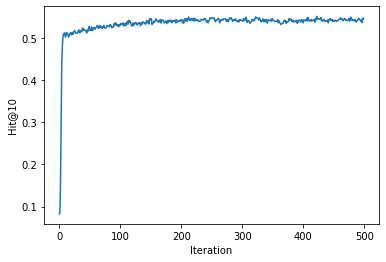

In [211]:
plt.plot(HIT)
plt.xlabel('Iteration')
plt.ylabel('Hit@10')
plt.savefig('bpr_hit.png', transparent=True)

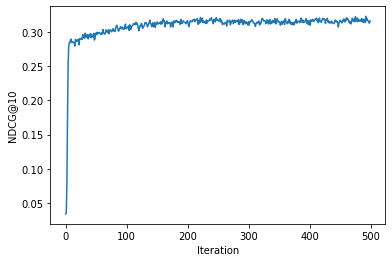

In [212]:
plt.plot(NDCG)
plt.xlabel('Iteration')
plt.ylabel('NDCG@10')
plt.savefig('bpr_ndcg.png', transparent=True)

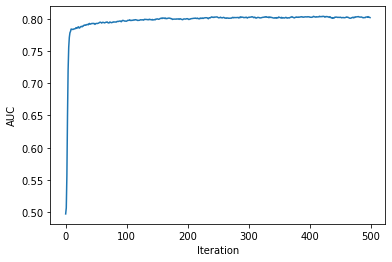

In [214]:
plt.plot(AUC_list)
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.savefig('bpr_auc.png', transparent=True)

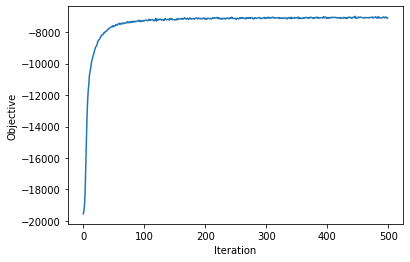

In [216]:
plt.plot(OBJ)
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.savefig('bpr_obj.png', transparent=True)

In [217]:
lfm_HIT = [0.40227434257285005, 0.4271499644633973, 0.43603411513859275, 0.4488272921108742, 0.4552238805970149, 0.4601990049751244, 0.4616204690831556, 0.4601990049751244, 0.46375266524520253, 0.46588486140724944, 0.4683724235963042, 0.46730632551528073, 0.4690831556503198, 0.46979388770433544, 0.468727789623312]
lfm_NDCG = [0.23578177389495514, 0.24737067173185645, 0.26013067849819427, 0.266020719238216, 0.2732275860916012, 0.27733527336527347, 0.2787457009965566, 0.2783221361352178, 0.27938628061528875, 0.280220666133825, 0.2809489747514861, 0.28175581244149034, 0.2829619124425451, 0.2830353180053308, 0.28272414543508284]
lfm_AUC = [0.6629744136460601, 0.7018727789623359, 0.7131663113006446, 0.7241862117981579, 0.7279282160625491, 0.7304761904761955, 0.7325373134328419, 0.7345167022032755, 0.7367341862118039, 0.7392110874200478, 0.742181947405833, 0.7443176972281502, 0.7455223880597064, 0.7456076759061885, 0.7460660980810274]

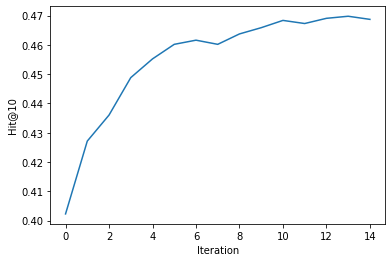

In [218]:
plt.plot(lfm_HIT)
plt.xlabel('Iteration')
plt.ylabel('Hit@10')
plt.savefig('lfm_hit.png', transparent=True)

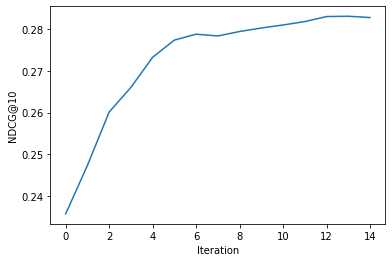

In [220]:
plt.plot(lfm_NDCG)
plt.xlabel('Iteration')
plt.ylabel('NDCG@10')
plt.savefig('lfm_ndcg.png', transparent=True)

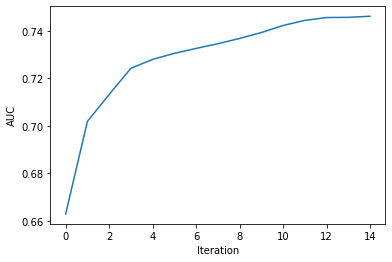

In [221]:
plt.plot(lfm_AUC)
plt.xlabel('Iteration')
plt.ylabel('AUC')
plt.savefig('lfm_auc.png', transparent=True)

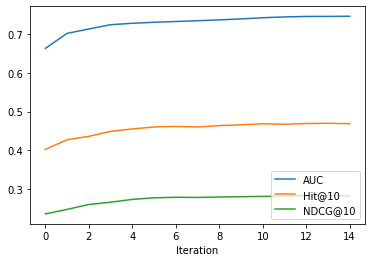

In [226]:
plt.plot(lfm_AUC, label='AUC')
plt.plot(lfm_HIT, label='Hit@10')
plt.plot(lfm_NDCG, label='NDCG@10')
plt.xlabel('Iteration')
plt.legend(loc='lower right')
# plt.ylabel('AUC')
plt.savefig('lfm.png', transparent=True)

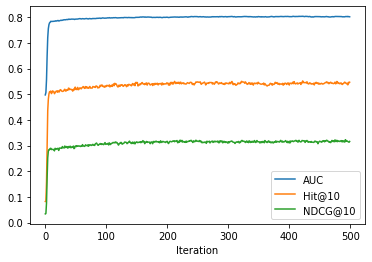

In [225]:
plt.plot(AUC_list, label='AUC')
plt.plot(HIT, label='Hit@10')
plt.plot(NDCG, label='NDCG@10')
plt.xlabel('Iteration')
plt.legend()
# plt.ylabel('AUC')
plt.savefig('bpr.png', transparent=True)

In [229]:
max(AUC_list)

0.8037739872068258

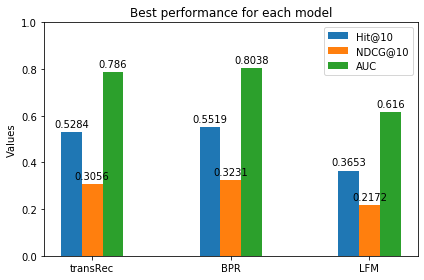

In [25]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['transRec', 'BPR', 'LFM']
# men_means = [0.5284, 0.3056, 0.7860]
# women_means = [0.5519, 0.3231, 0.8038]
# third_means = [0.4737, 0.2862, 0.7468]

men_means = [0.5284, 0.5519, 0.3653]
women_means = [0.3056, 0.3231, 0.2172]
third_means = [0.7860, 0.8038, 0.6160]


x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, men_means, width, label='Hit@10')
rects2 = ax.bar(x, women_means, width, label='NDCG@10')
rects3 = ax.bar(x + width, third_means, width, label='AUC')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Best performance for each model')
ax.set_xticks(x)
#ax.ylim(0, 1)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.ylim(0, 1)
plt.show()